# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data


In [126]:
ad_data = pd.read_csv('advertising.csv')

In [127]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [128]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [129]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [176]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [179]:
ad_data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

## Exploratory Data Analysis

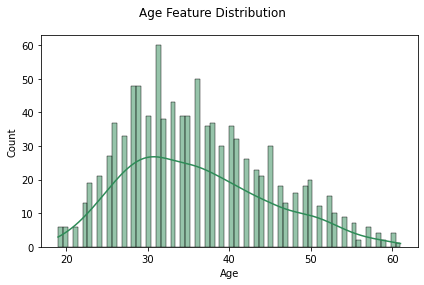

In [130]:
sns.histplot(ad_data['Age'], kde=True, color='seagreen', bins=70)
plt.suptitle('Age Feature Distribution')
plt.tight_layout()
plt.show()

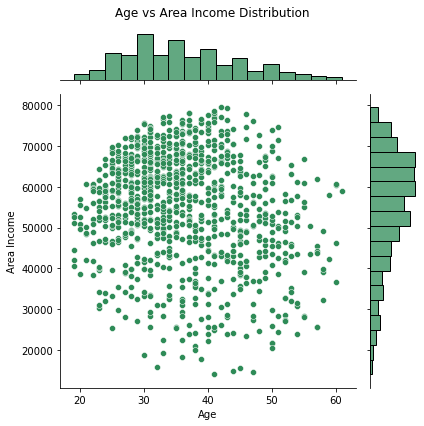

In [131]:
jointplot = sns.jointplot(data=ad_data, x='Age', y='Area Income', color = 'seagreen')
plt.suptitle('Age vs Area Income Distribution')
plt.tight_layout()
plt.show()

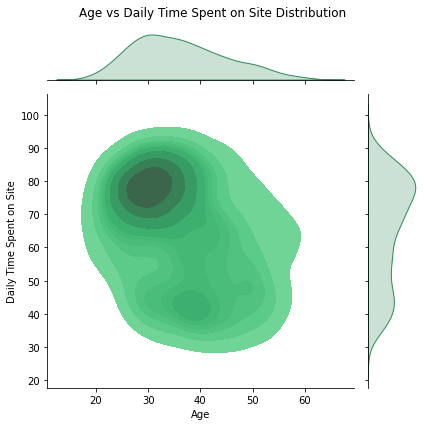

In [132]:
jointplot = sns.jointplot(data=ad_data, x='Age',y='Daily Time Spent on Site', kind='kde', color = 'seagreen', fill = True)
plt.suptitle('Age vs Daily Time Spent on Site Distribution')
plt.tight_layout()
plt.show()

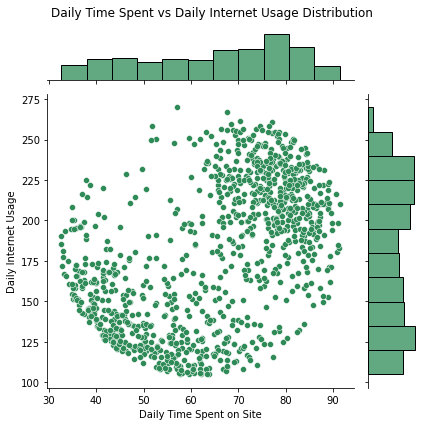

In [133]:
jointplot = sns.jointplot(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage', color = 'seagreen')
plt.suptitle('Daily Time Spent vs Daily Internet Usage Distribution')
plt.tight_layout()
plt.show()

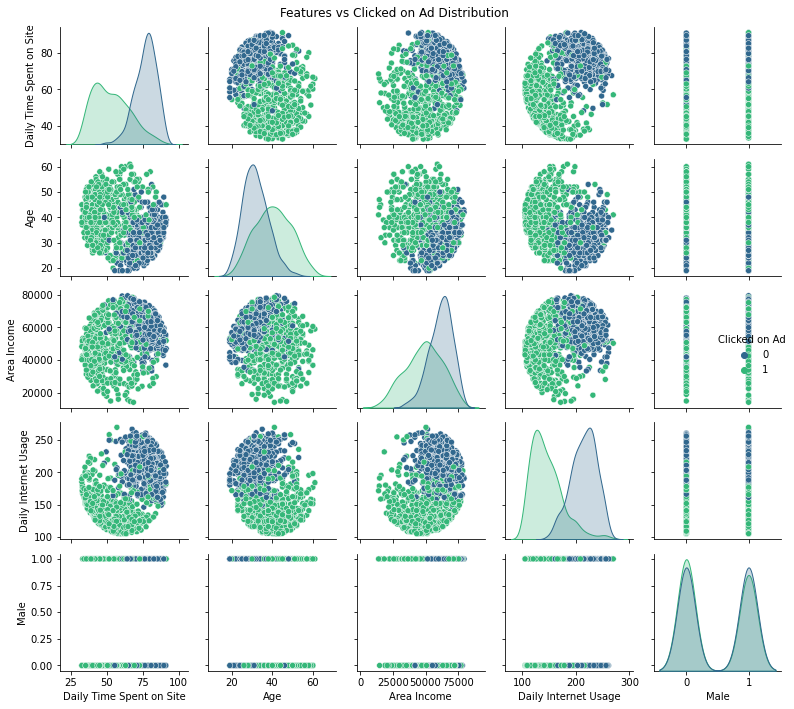

In [134]:
pairplot = sns.pairplot(data=ad_data, hue='Clicked on Ad', palette='viridis', height = 2)
plt.suptitle('Features vs Clicked on Ad Distribution')
plt.tight_layout()
plt.show()

In [205]:
for i in ad_data.select_dtypes(include=['object']).columns:
    print(f'{i} nunique:{ad_data[i].nunique()}')

Ad Topic Line nunique:1000
City nunique:969
Country nunique:237
Timestamp nunique:1000


In [209]:
ad_data['Timestamp'].apply(lambda x: x[:4]).unique()

array(['2016'], dtype=object)

In [214]:
sorted(ad_data['Timestamp'].apply(lambda x: x[5:7]).unique())

['01', '02', '03', '04', '05', '06', '07']

# Logistic Regression Model

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]
y = ad_data['Clicked on Ad']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, 
                                                    random_state=101)

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()

In [151]:
scaler.fit(X_train)

StandardScaler()

In [163]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [166]:
pd.DataFrame({'coeff': logmodel.coef_[0],'exp(coeff)':np.exp(logmodel.coef_[0])},index=X.columns)

,coeff,exp(coeff)
Daily Time Spent on Site,-2.414260,0.089433
Age,1.095290,2.990050
Area Income,-1.392271,0.248510
Daily Internet Usage,-2.297730,0.100487
Male,-0.222436,0.800566


## Predictions and Evaluations

In [172]:
predictions = logmodel.predict(X_test)

In [173]:
from sklearn.metrics import classification_report

In [174]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [220]:
random_index = np.random.randint(0, len(X_test))
random_customer = X_test[random_index]
actual_value = y_test.iloc[random_index]

predicted_value = logmodel.predict([random_customer])[0]

print("\nActual Clicked on Ad:", actual_value)
print("Predicted Clicked on Ad:", predicted_value)


Actual Clicked on Ad: 1
Predicted Clicked on Ad: 1
